In [1]:
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import euclidean_distances 

In [2]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

# Plus Proche Voisin

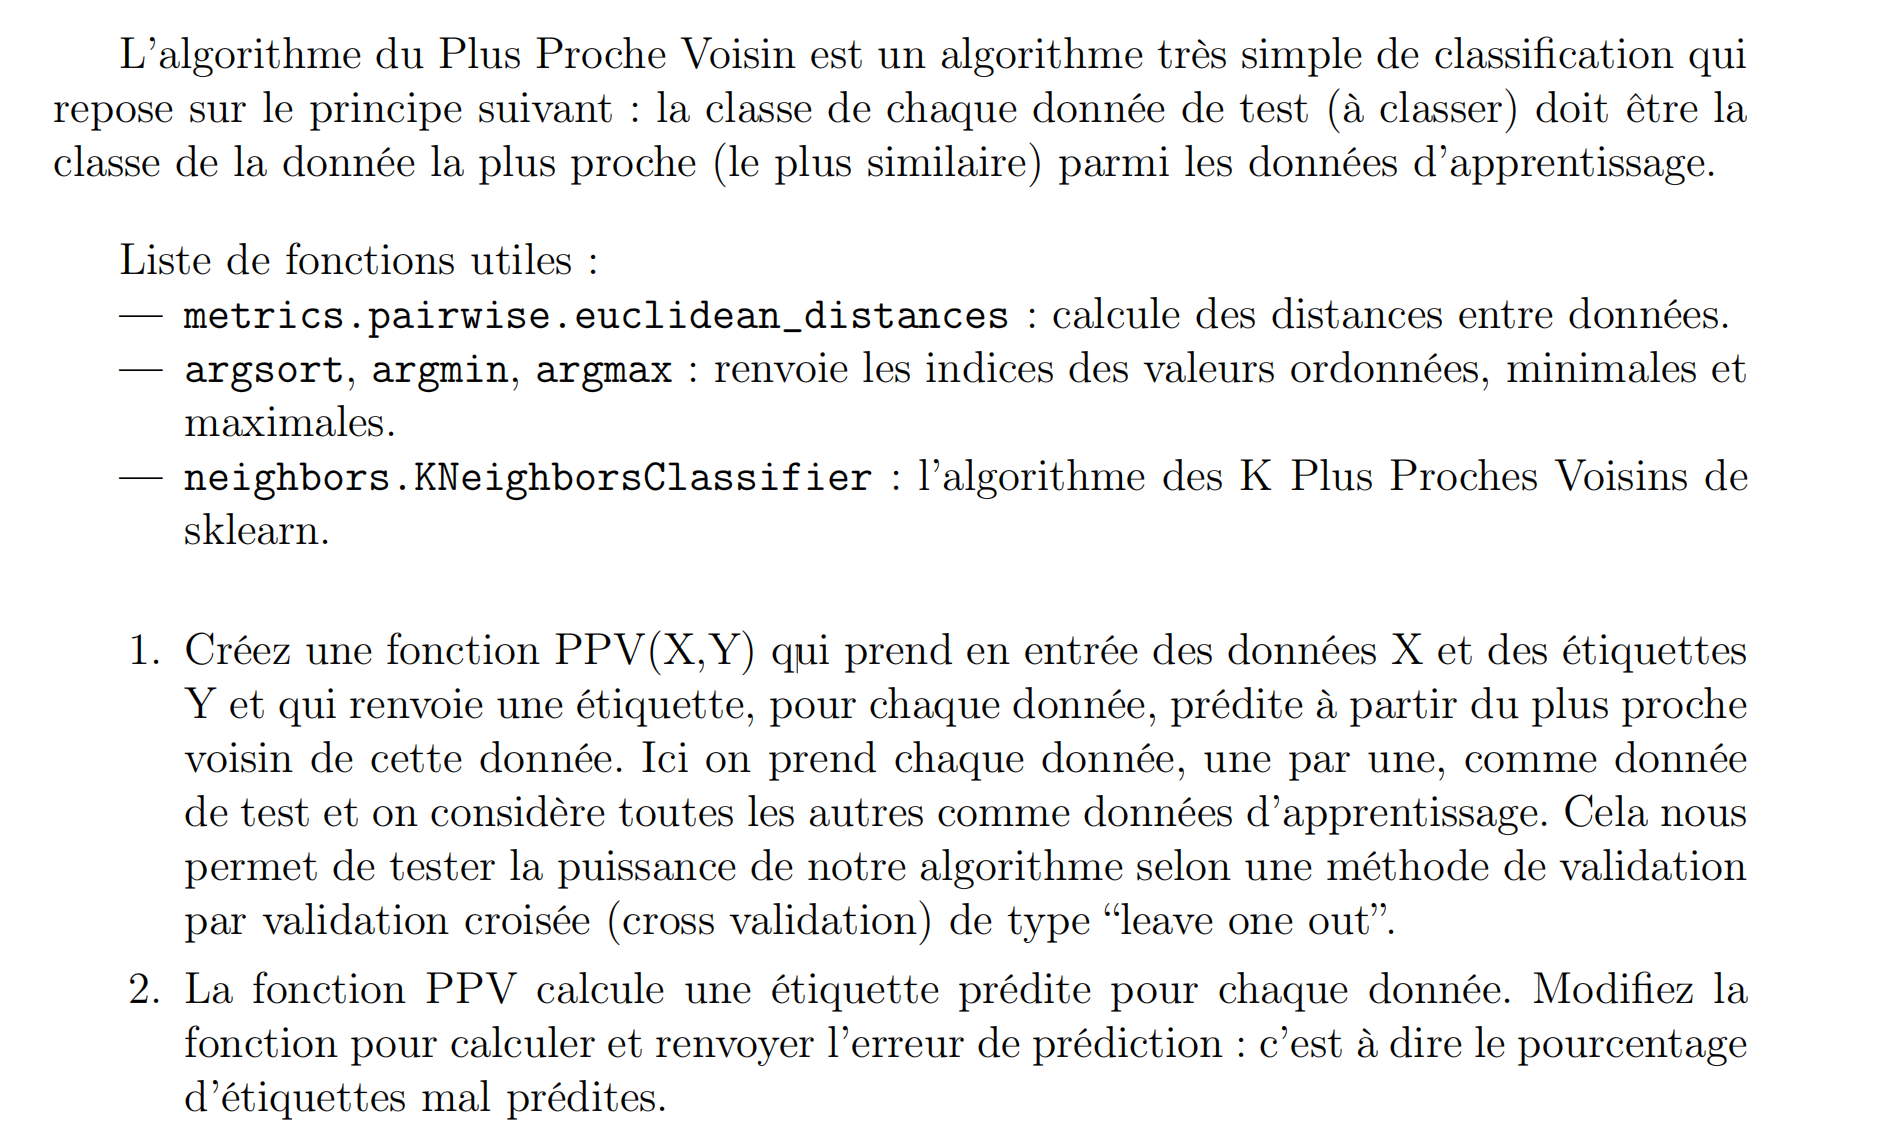

In [211]:
def ppv1(X,Y):
    predict = []
    for i in range(0,len(X)):
        newX = np.delete(X,i,0)
        newy = np.delete(y,i,0)
        dst = []
        for j in newX:
            dst.append(euclidean_distances([j],[X[i]]))
        index = dst.index(min(dst))
        predict.append(newy[index])
    return predict

In [464]:
def ppv2(X,Y):
    predict = []
    acc = 0
    for i in range(0,len(X)):
        newX = np.delete(X,i,0)
        newy = np.delete(Y,i,0)
        dst = []
        for j in newX:
            dst.append(euclidean_distances([j],[X[i]]))
        index = dst.index(min(dst))
        predict.append(newy[index])
        if newy[index] == Y[i]:
            acc += 1
    return (predict , ( 1 - acc/len(X)))

In [213]:
predicted = ppv1(iris.data , iris.target)

In [214]:
print(predicted)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [465]:
predicted2 , errp = ppv2(iris.data ,iris.target ) 

In [466]:
print(predicted2)
print("le pourcentage d’étiquettes mal prédites : " ,errp)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
le pourcentage d’étiquettes mal prédites :  0.040000000000000036


 la fonction des K Plus Proches Voisins de sklearn 

In [217]:
def ppv_sklearn(x,y):
    predicted = []
    acc = 0
    for i in range(len(x)):
        a = np.delete(x,i,0)
        b = np.delete(y,i,0)
        knn = KNeighborsClassifier(n_neighbors=3)
        knn = knn.fit(a,b)
        predicted.append(knn.predict( [x[i]] ).item() )
        if predicted[i] == y[i]:
            acc += 1
            
    return ( predicted , ( 1 - acc/len(x)) )

In [218]:
pre , errp = ppv_sklearn(iris.data , iris.target)
print(pre)
print()
print("le pourcentage d’étiquettes mal prédites : " ,errp)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

le pourcentage d’étiquettes mal prédites :  0.040000000000000036


en fin en constate que le pourcentage d’étiquettes mal prédites en utilisant la fonction KNeighborsClassifier de sklearn 
et la mathode que nous avons implementer dans des meme résultat.

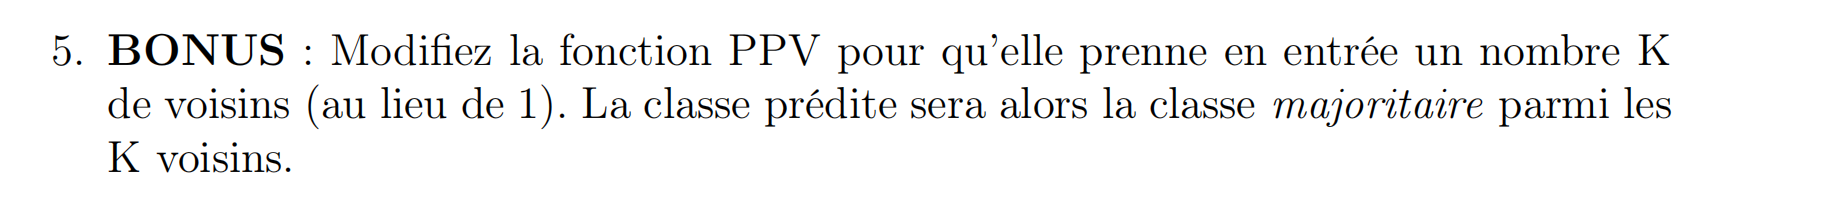

In [13]:
def ppvk(X,Y,k):
    predict = []
    acc = 0
    for i in range(len(X)):
        newX = np.delete(X,i,0)
        newy = np.delete(Y,i,0)
        dst  = []
        for j in newX:
            dst.append( euclidean_distances([j],[X[i]]).item() )
        
        '''kppv = sorted(dst)[0:k]
        #kppv = dst[0:k]
        # 0 0 1 1 2 2  => 0:2 1:2 2:2
        unique, counts = np.unique([ elem for dist,elem in kppv] ,return_counts=True) 
        predict.append( unique[np.argmax(counts)] )'''
        argDstSort = np.argsort(dst) 
        classes = [ Y[elem] for elem in argDstSort[:k]] # 0 0 0 1 1 
        countOcurrence = [classes.count(elem) for elem in classes]
        predict.append(classes[ np.argmax(countOcurrence)].item() )
        if predict[i] == Y[i]:
            acc += 1
        
    return (predict , ( 1 - acc/len(X)))

In [14]:
predk , acck = ppvk(iris.data , iris.target ,5)

In [15]:
print(predk)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [16]:
acck

0.033333333333333326

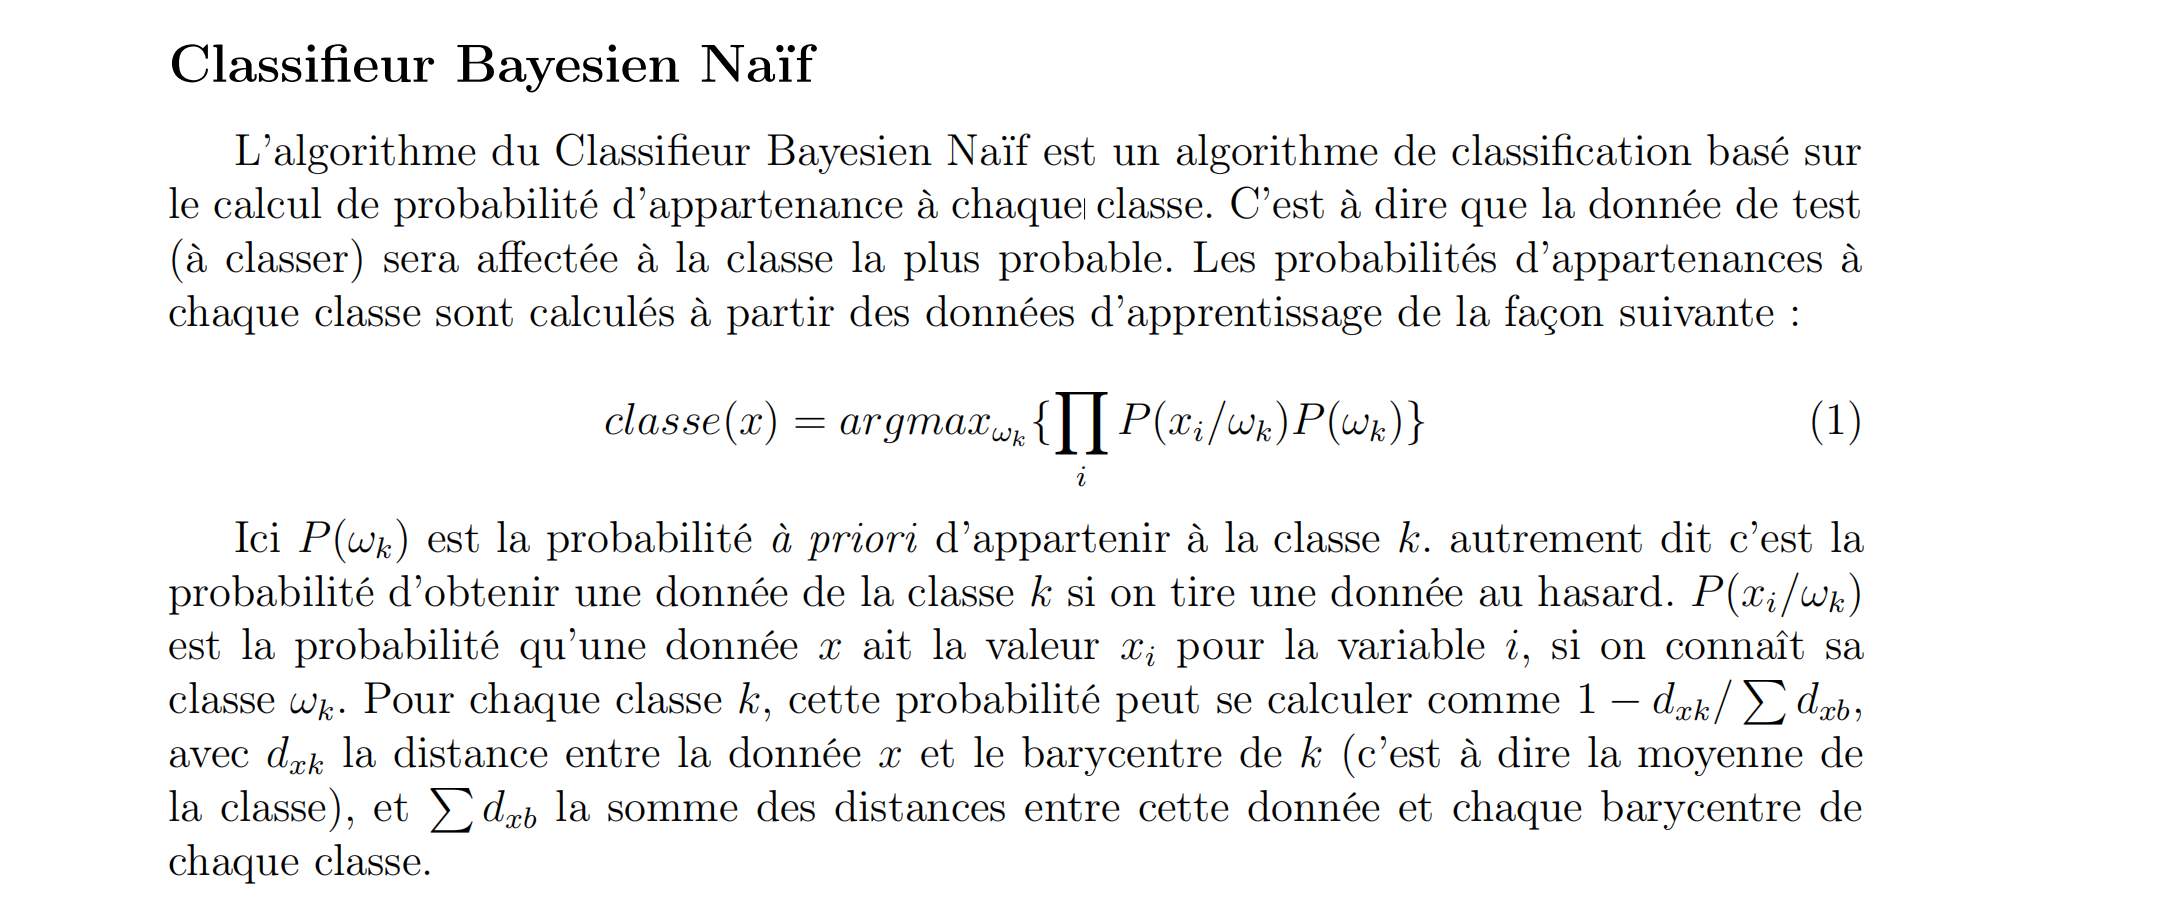

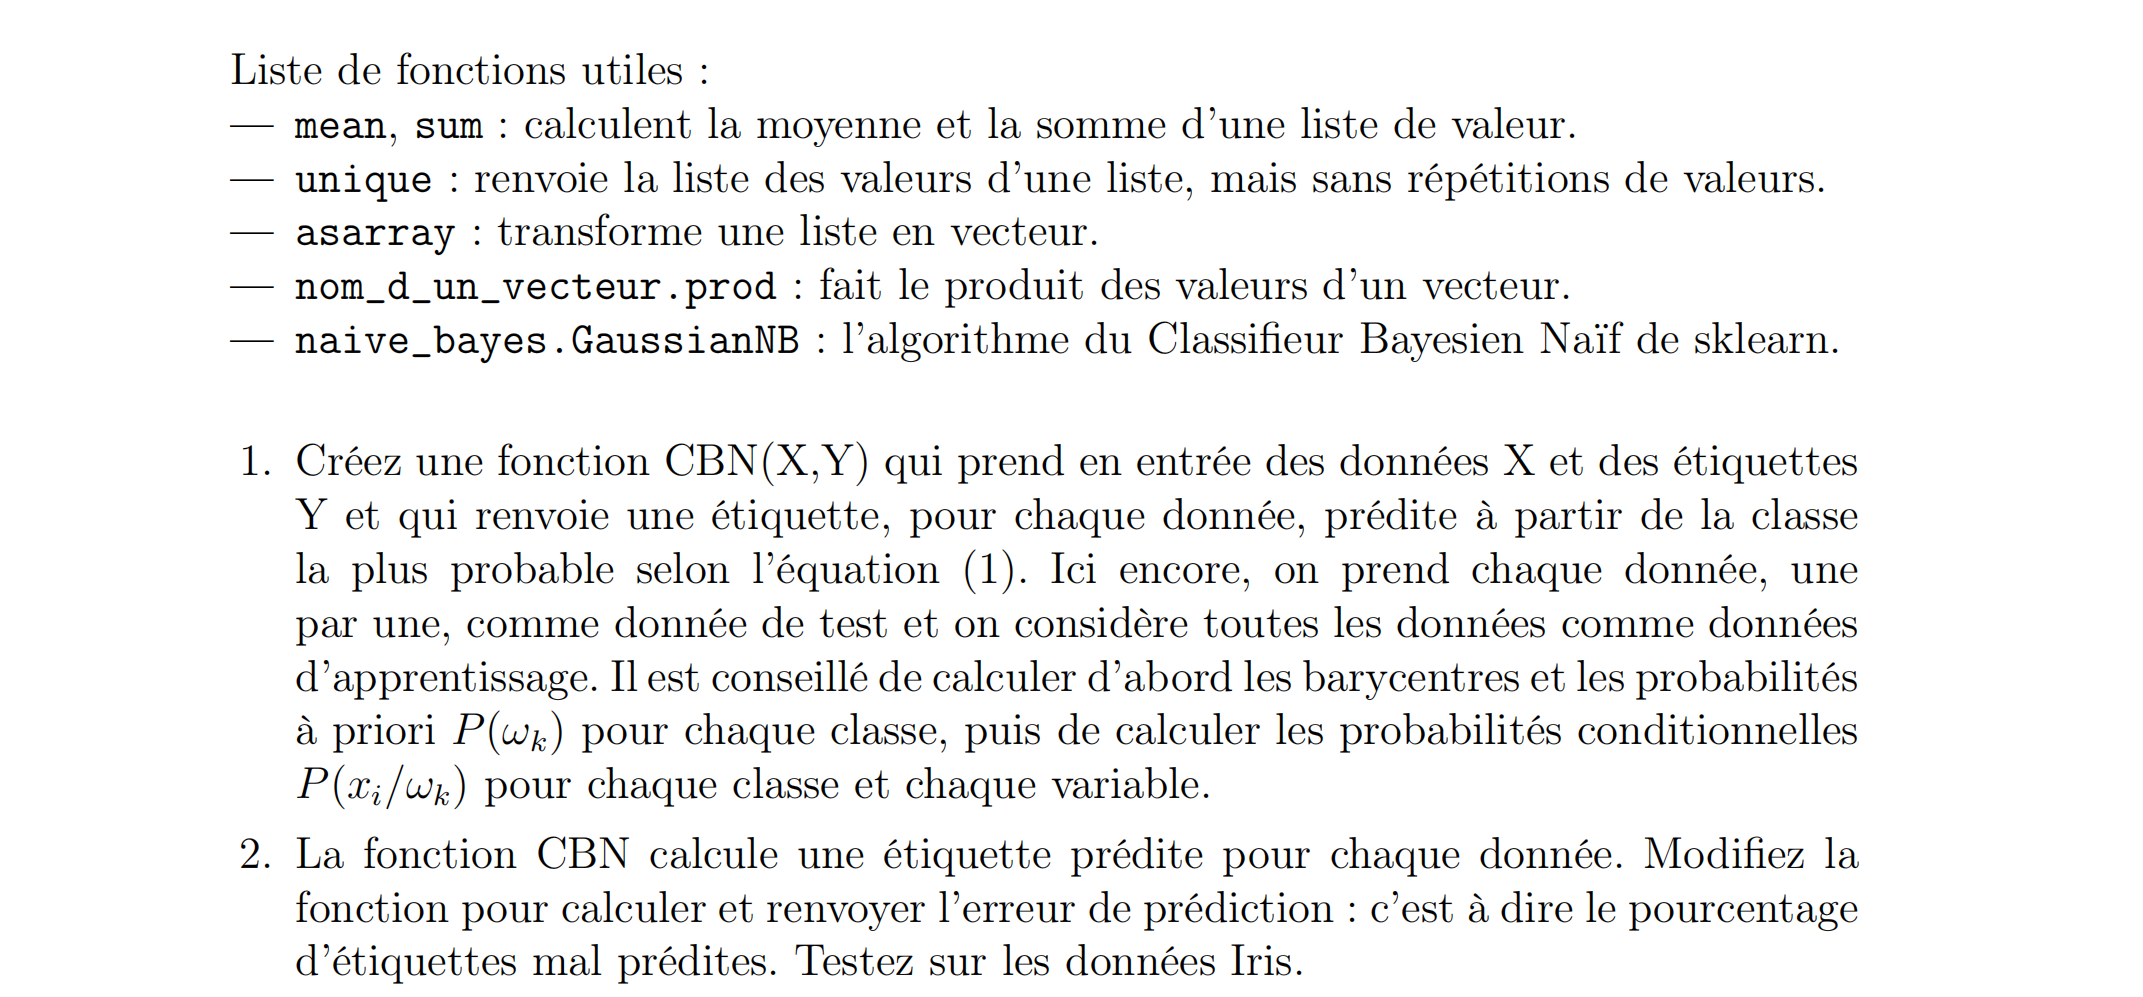

In [17]:
def CBN(x,y):
    predict = []
    acc = 0
    for i in range(0,len(x)):
        newX  = np.delete(x,i,0)
        newy  = np.delete(y,i,0)
        
        # moyennes and dxk
        #(mean class , pw)
        dxk = [ euclidean_distances( [x[i]] , [newX[newy == elem].mean(0)] )  for elem in np.unique(newy) ]
        #somme calc
        somme =  np.sum(dxk)
        probcond = [ (1 - elem/somme) for elem in dxk ]
        pw       = [ probcond[elem] * ( len(newX[newy == elem]) / len(x) )  for elem in np.unique(newy) ]
        predict.append(np.argmax(pw))
        
        if predict[i] == y[i]:
            acc += 1
        
    return predict , 1 - acc/len(x)
    
    

In [18]:
pre , acc = CBN(iris.data ,iris.target)

In [533]:
print(pre)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2]


In [534]:
acc

0.10666666666666669

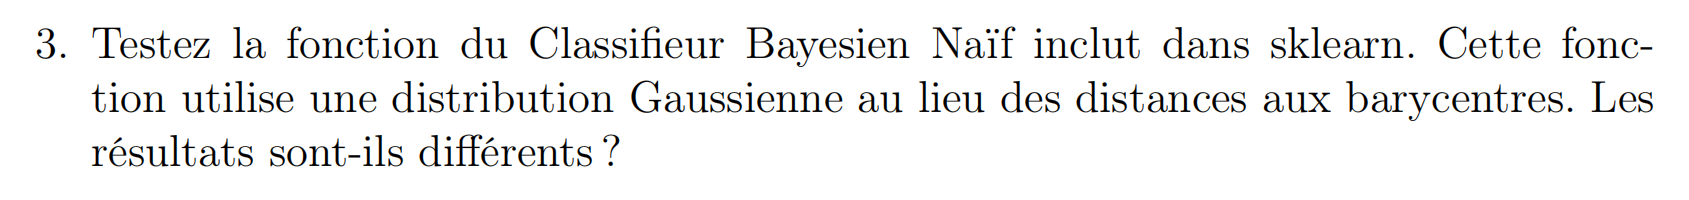

In [333]:
from sklearn.naive_bayes import GaussianNB

In [343]:
def CBN_G(x,y):
    predict = []
    acc = 0
    for i in range(0,len(x)):
        newX  = np.delete(x,i,0)
        newy  = np.delete(y,i,0)
        
        clf = GaussianNB()
        clf = clf.fit(newX, newy)
        predict.append(clf.predict([x[i]]).item())
        
        if predict[i] == y[i]:
            acc += 1
        
    return predict , 1 - acc/len(x)
        

In [344]:
preG , accG = CBN_G(iris.data ,iris.target)

In [345]:
print(preG)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [342]:
accG

0.046666666666666634